Name: Tewodros Berhanu

ID: UGR/9715/13

# Assignment 2: Multi-Armed Bandit Algorithms: Exploration vs Exploitation

This notebook provides a comprehensive comparison of three key multi-armed bandit algorithms:

- **Epsilon-Greedy**: Simple randomized exploration
- **Upper Confidence Bound (UCB)**: Confidence-based exploration  
- **Thompson Sampling**: Bayesian posterior sampling

## Structure

1. **Setup & Algorithm Overview**
2. **Experimental Design**
3. **Results Collection**
4. **Comprehensive Analysis & Visualization**
5. **Conclusions & Recommendations**


# 1. Setup & Algorithm Overview


In [1]:
# Import libraries and algorithms
import numpy as np
import matplotlib.pyplot as plt
from e_greedy import EpsilonGreedy
from ucb import UCB
from thompson import ThompsonSampling

# Import experiment runners
from experiments import (
    run_epsilon_greedy_experiment,
    run_ucb_experiment,
    run_thompson_sampling_experiment,
    compare_ucb_epsilon_greedy,
    compare_all_algorithms,
)

# Set random seed for reproducibility
np.random.seed(42)

## Algorithm Overview

As we have covered in our lectures and slides, these are the three algorithms we will be using to solve the multi-armed bandit problem.

| Algorithm | Strategy | Key Features | Parameters |
|-----------|----------|--------------|------------|
| **Epsilon-Greedy** | Explore with probability ε | Simple, intuitive | ε (exploration rate) |
| **UCB** | Q(a) + c√(ln(t)/N(a)) | Principled, theoretical bounds | c (confidence parameter) |
| **Thompson Sampling** | Bayesian posterior sampling | Optimal for many problems | Prior parameters |

For performance, the following will be used to evaluate the algorithms:
- **Total Reward**: Cumulative reward over time
- **Regret**: Difference from optimal performance  
- **Convergence Speed**: Rate of learning optimal policy
- **Exploration Efficiency**: How quickly algorithms identify best arms


# 2. Experimental Setup


In [2]:
# Define experimental parameters
EXPERIMENT_CONFIG = {
    "n_steps": 1000,  # Steps per episode
    "n_runs": 100,  # Independent runs for averaging
    "arm_means": [0.1, 0.3, 0.7, 0.5],  # Normal bandit (Arm 2 is optimal)
    "arm_probs": [0.1, 0.3, 0.8, 0.5],  # Bernoulli bandit (Arm 2 is optimal)
    "epsilon_values": [0.0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    "c_values": [0.5, 0.8, 1.0, 1.5, 2.0, 3.0, 4.0],
}

print("Experimental Configuration:")
print("-" * 30)
for key, value in EXPERIMENT_CONFIG.items():
    print(f"{key}: {value}")

print(
    f"\nOptimal arm (normal): {np.argmax(EXPERIMENT_CONFIG['arm_means'])} (μ={max(EXPERIMENT_CONFIG['arm_means'])})"
)
print(
    f"Optimal arm (Bernoulli): {np.argmax(EXPERIMENT_CONFIG['arm_probs'])} (p={max(EXPERIMENT_CONFIG['arm_probs'])})"
)

Experimental Configuration:
------------------------------
n_steps: 1000
n_runs: 100
arm_means: [0.1, 0.3, 0.7, 0.5]
arm_probs: [0.1, 0.3, 0.8, 0.5]
epsilon_values: [0.0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
c_values: [0.5, 0.8, 1.0, 1.5, 2.0, 3.0, 4.0]

Optimal arm (normal): 2 (μ=0.7)
Optimal arm (Bernoulli): 2 (p=0.8)


# 3. Experiment Execution

Now we'll run all experiments and collect results without plotting interruptions.


### 1. Epsilon-Greedy Parameter Analysis

In [3]:
print("Experiment 1: Epsilon-Greedy Parameter Analysis")
print("=" * 50)

eps_results = run_epsilon_greedy_experiment(
    arm_means=EXPERIMENT_CONFIG["arm_means"],
    epsilon_values=EXPERIMENT_CONFIG["epsilon_values"],
    n_steps=EXPERIMENT_CONFIG["n_steps"],
    n_runs=EXPERIMENT_CONFIG["n_runs"],
)

Experiment 1: Epsilon-Greedy Parameter Analysis
Running Epsilon-Greedy Experiment
Arm means: [0.1, 0.3, 0.7, 0.5]
Optimal arm: 2 (reward: 0.70)
Epsilon values: [0.0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
--------------------------------------------------
Testing ε = 0.0
  Average total reward: 535.63 ± 186.36
  Final cumulative regret: 164.37
Testing ε = 0.01
  Average total reward: 565.11 ± 142.60
  Final cumulative regret: 134.89
Testing ε = 0.03
  Average total reward: 613.45 ± 105.55
  Final cumulative regret: 86.55
Testing ε = 0.05
  Average total reward: 606.23 ± 95.18
  Final cumulative regret: 93.77
Testing ε = 0.1
  Average total reward: 618.69 ± 64.34
  Final cumulative regret: 81.31
Testing ε = 0.2
  Average total reward: 609.50 ± 47.03
  Final cumulative regret: 90.50
Testing ε = 0.3
  Average total reward: 591.73 ± 50.65
  Final cumulative regret: 108.27
Testing ε = 0.5
  Average total reward: 539.57 ± 38.52
  Final cumulative regret: 160.43
Testing ε = 0.7
  Ave

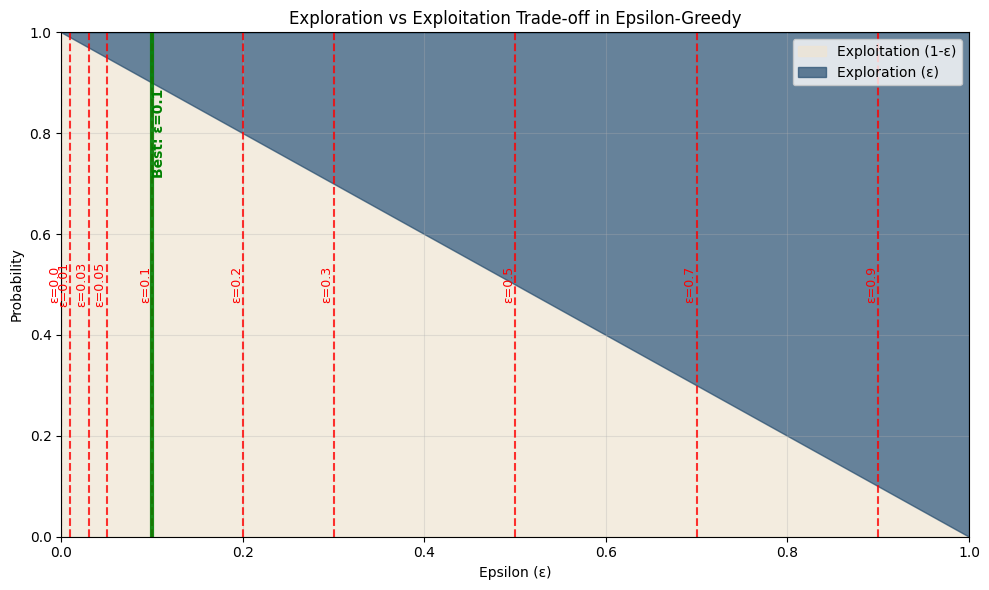


Exploration-Exploitation Balance:
• Low ε (< 0.1): High exploitation, low exploration
• Medium ε (0.1-0.3): Balanced approach
• High ε (> 0.3): High exploration, low exploitation
• Optimal ε = 0.1: 90.0% exploitation, 10.0% exploration


In [4]:
best_eps = min(eps_results.keys(), key=lambda x: eps_results[x]["final_regret"])

# Add exploration vs exploitation visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create exploration vs exploitation scale
epsilons_extended = np.linspace(0, 1, 100)
exploitation = 1 - epsilons_extended
exploration = epsilons_extended

# Plot the scales
ax.fill_between(
    epsilons_extended,
    0,
    exploitation,
    alpha=0.7,
    color="#EFE4D2",
    label="Exploitation (1-ε)",
)
ax.fill_between(
    epsilons_extended,
    exploitation,
    1,
    alpha=0.7,
    color="#254D70",
    label="Exploration (ε)",
)

# Mark the tested epsilon values
tested_epsilons = list(eps_results.keys())
for eps in tested_epsilons:
    ax.axvline(x=eps, color="red", linestyle="--", alpha=0.8)
    ax.text(
        eps,
        0.5,
        f"ε={eps}",
        rotation=90,
        verticalalignment="center",
        horizontalalignment="right",
        fontsize=9,
        color="red",
    )

# Highlight the best epsilon
ax.axvline(x=best_eps, color="green", linewidth=3, alpha=0.9)
ax.text(
    best_eps,
    0.8,
    f"Best: ε={best_eps}",
    rotation=90,
    verticalalignment="center",
    horizontalalignment="left",
    fontsize=10,
    color="green",
    fontweight="bold",
)

ax.set_xlabel("Epsilon (ε)")
ax.set_ylabel("Probability")
ax.set_title("Exploration vs Exploitation Trade-off in Epsilon-Greedy")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"\nExploration-Exploitation Balance:")
print(f"• Low ε (< 0.1): High exploitation, low exploration")
print(f"• Medium ε (0.1-0.3): Balanced approach")
print(f"• High ε (> 0.3): High exploration, low exploitation")
print(
    f"• Optimal ε = {best_eps}: {(1-best_eps)*100:.1f}% exploitation, {best_eps*100:.1f}% exploration"
)

### 2. UCB Parameter Analysis

In [5]:
# Experiment 2: UCB Parameter Analysis
print("\nExperiment 2: UCB Parameter Analysis")
print("=" * 50)

ucb_results = run_ucb_experiment(
    arm_means=EXPERIMENT_CONFIG["arm_means"],
    c_values=EXPERIMENT_CONFIG["c_values"],
    n_steps=EXPERIMENT_CONFIG["n_steps"],
    n_runs=EXPERIMENT_CONFIG["n_runs"],
)


Experiment 2: UCB Parameter Analysis
Running UCB Experiment
Arm means: [0.1, 0.3, 0.7, 0.5]
Optimal arm: 2 (reward: 0.70)
C values: [0.5, 0.8, 1.0, 1.5, 2.0, 3.0, 4.0]
--------------------------------------------------
Testing c = 0.5
  Average total reward: 628.22 ± 112.99
  Final cumulative regret: 71.78
Testing c = 0.8
  Average total reward: 651.03 ± 73.55
  Final cumulative regret: 48.97
Testing c = 1.0
  Average total reward: 655.18 ± 36.62
  Final cumulative regret: 44.82
Testing c = 1.5
  Average total reward: 629.77 ± 38.60
  Final cumulative regret: 70.23
Testing c = 2.0
  Average total reward: 607.60 ± 36.51
  Final cumulative regret: 92.40
Testing c = 3.0
  Average total reward: 567.00 ± 38.96
  Final cumulative regret: 133.00
Testing c = 4.0
  Average total reward: 531.13 ± 33.47
  Final cumulative regret: 168.87


In [6]:
print("\nExperiment 3: Thompson Sampling Analysis")
print("=" * 50)

ts_results = run_thompson_sampling_experiment(
    arm_probs=EXPERIMENT_CONFIG["arm_probs"],
    n_steps=EXPERIMENT_CONFIG["n_steps"],
    n_runs=EXPERIMENT_CONFIG["n_runs"],
)


Experiment 3: Thompson Sampling Analysis
Running Thompson Sampling Experiment
Arm probabilities: [0.1, 0.3, 0.8, 0.5]
Optimal arm: 2 (probability: 0.800)
--------------------------------------------------
Average total reward: 788.06 ± 15.18
Final cumulative regret: 11.94
Success rate: 0.788


In [7]:
# Experiment 4: Algorithm Comparison
print("\nExperiment 4: Algorithm Comparison")
print("=" * 50)

# Compare UCB vs Epsilon-Greedy (normal bandits)
comparison_results = compare_ucb_epsilon_greedy(
    arm_means=EXPERIMENT_CONFIG["arm_means"],
    n_steps=EXPERIMENT_CONFIG["n_steps"],
    n_runs=EXPERIMENT_CONFIG["n_runs"],
)

# Compare all algorithms (Bernoulli bandits)
all_results = compare_all_algorithms(
    arm_probs=EXPERIMENT_CONFIG["arm_probs"],
    n_steps=EXPERIMENT_CONFIG["n_steps"],
    n_runs=EXPERIMENT_CONFIG["n_runs"],
)


Experiment 4: Algorithm Comparison
Comparing UCB vs Epsilon-Greedy
Arm means: [0.1, 0.3, 0.7, 0.5]
Optimal arm: 2 (reward: 0.70)
--------------------------------------------------
Testing UCB (c=2.0)
  Average total reward: 607.59 ± 41.24
  Final cumulative regret: 92.41
Testing UCB (c=1.0)
  Average total reward: 661.50 ± 40.16
  Final cumulative regret: 38.50
Testing ε-greedy (ε=0.1)
  Average total reward: 629.87 ± 61.38
  Final cumulative regret: 70.13
Testing ε-greedy (ε=0.01)
  Average total reward: 564.30 ± 145.92
  Final cumulative regret: 135.70
Comparing All Algorithms on Bernoulli Bandits
Arm probabilities: [0.1, 0.3, 0.8, 0.5]
Optimal arm: 2 (probability: 0.800)
--------------------------------------------------
Testing Thompson Sampling
  Average total reward: 787.68 ± 12.97
  Success rate: 0.788
  Final cumulative regret: 12.32
Testing UCB (c=2.0)
  Average total reward: 711.90 ± 16.22
  Success rate: 0.712
  Final cumulative regret: 88.10
Testing ε-greedy (ε=0.1)
  Aver

# 4. Results Analysis & Visualization

Now we analyze all experimental results with comprehensive visualizations.


Creating Parameter Analysis Plots...


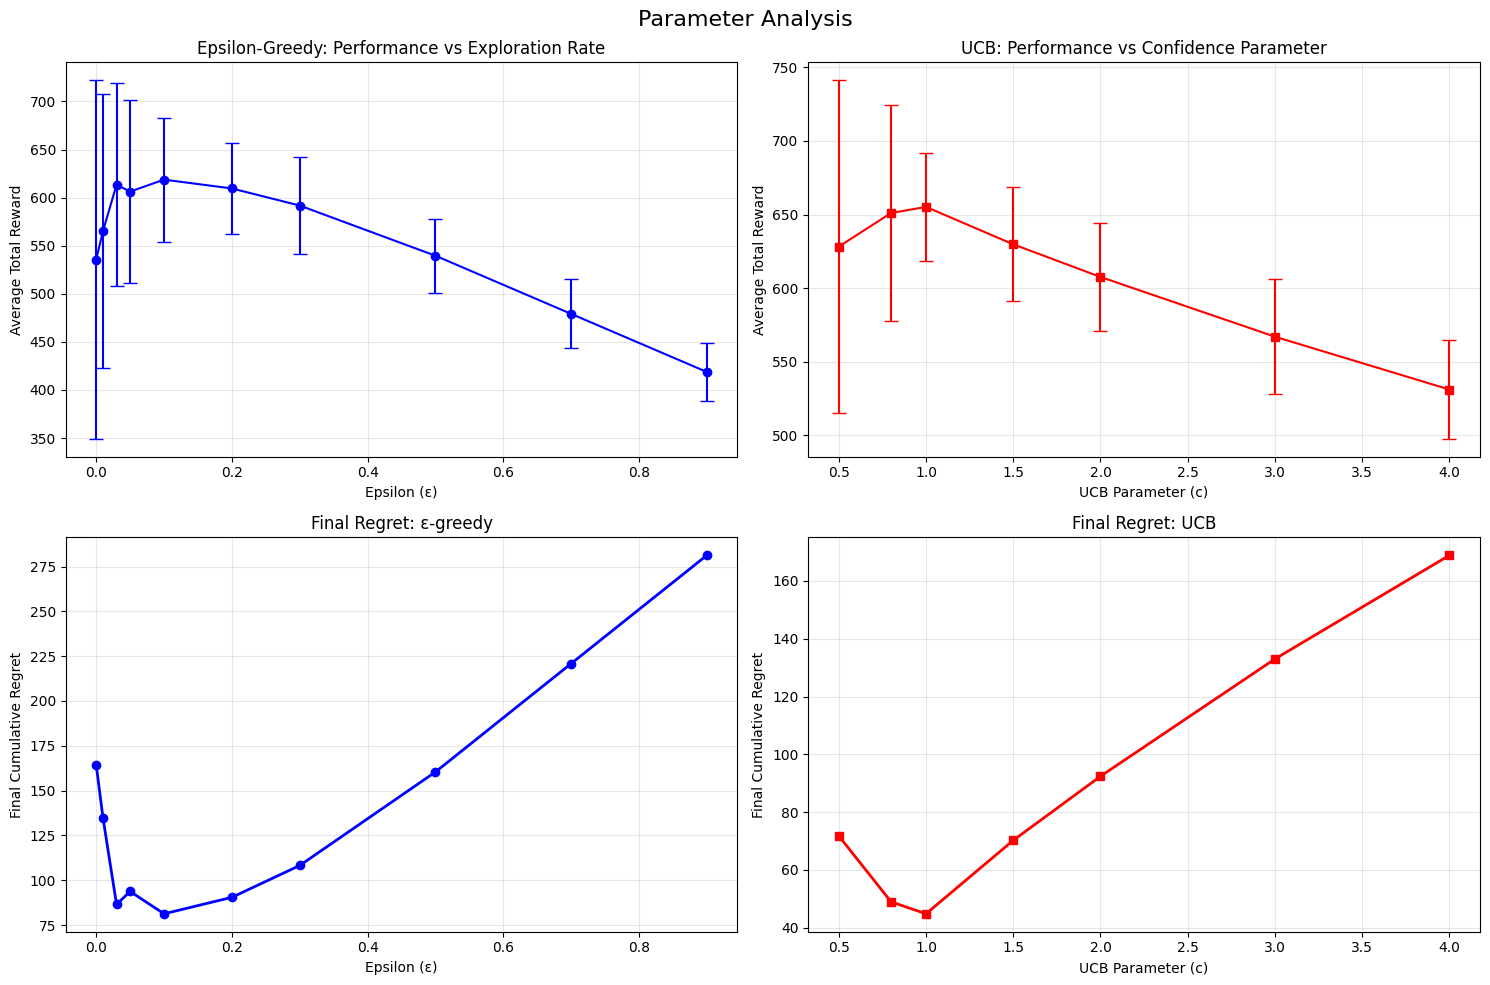

\nCreating Algorithm Comparison Plots...


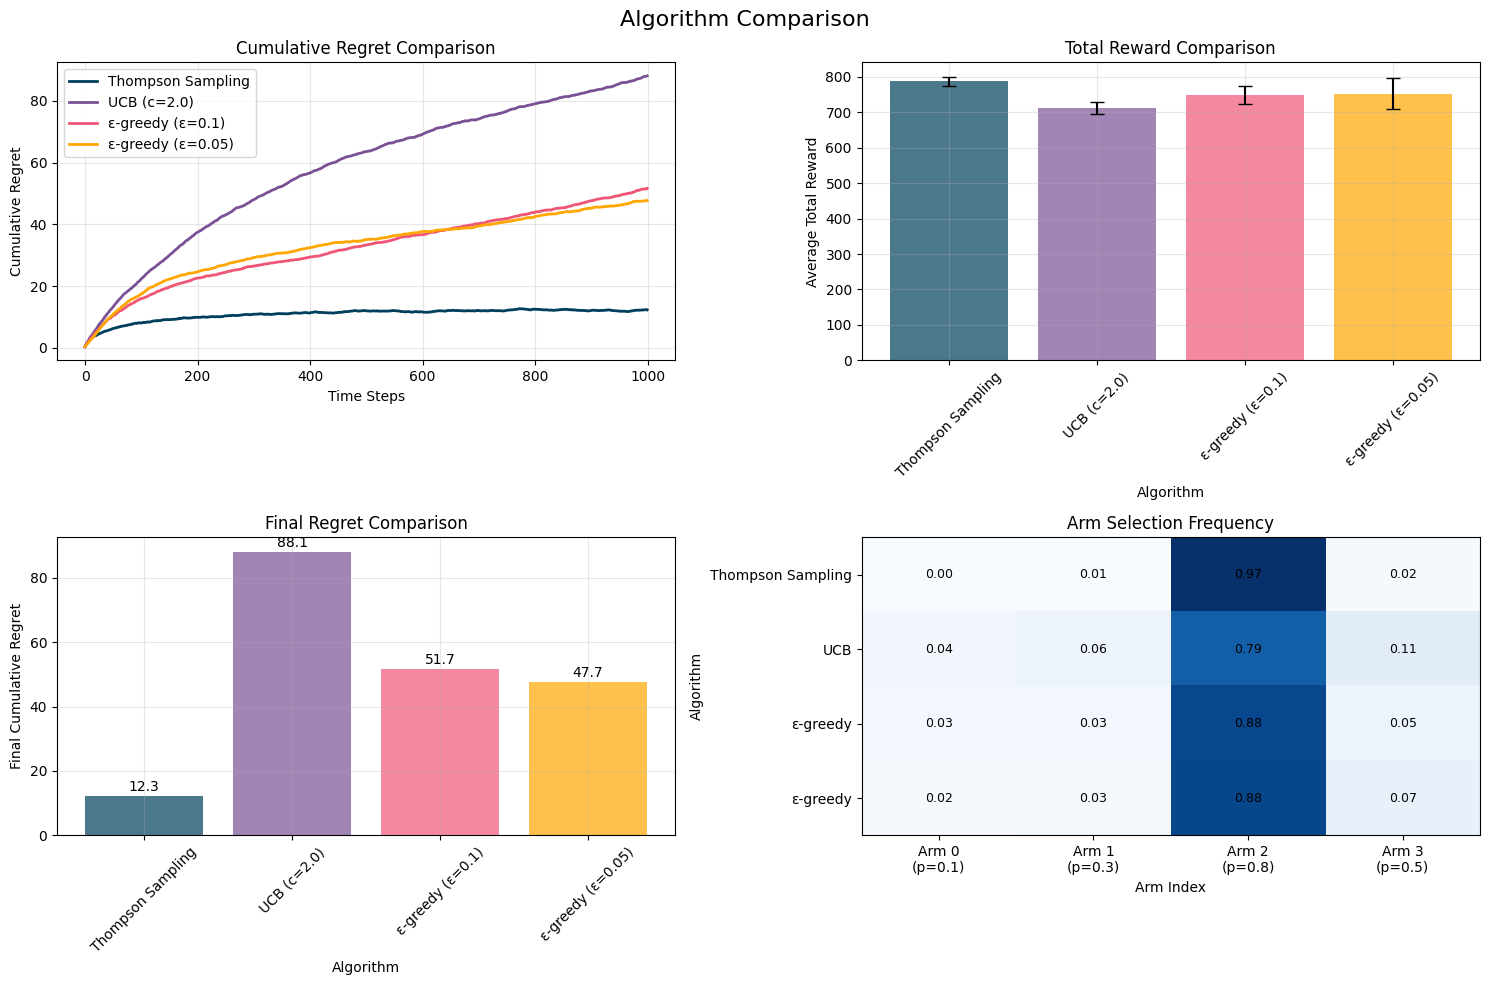

In [8]:
def plot_parameter_analysis(eps_results, ucb_results):
    """Plot parameter sensitivity analysis for ε-greedy and UCB"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    fig.suptitle("Parameter Analysis", fontsize=16)

    # Epsilon-Greedy: Total Reward vs Epsilon
    epsilons = list(eps_results.keys())
    avg_rewards = [eps_results[eps]["avg_total_reward"] for eps in epsilons]
    std_rewards = [eps_results[eps]["std_total_reward"] for eps in epsilons]

    ax1.errorbar(
        epsilons, avg_rewards, yerr=std_rewards, marker="o", capsize=5, color="blue"
    )
    ax1.set_xlabel("Epsilon (ε)")
    ax1.set_ylabel("Average Total Reward")
    ax1.set_title("Epsilon-Greedy: Performance vs Exploration Rate")
    ax1.grid(True, alpha=0.3)

    # UCB: Total Reward vs c parameter
    c_vals = list(ucb_results.keys())
    ucb_avg_rewards = [ucb_results[c]["avg_total_reward"] for c in c_vals]
    ucb_std_rewards = [ucb_results[c]["std_total_reward"] for c in c_vals]

    ax2.errorbar(
        c_vals,
        ucb_avg_rewards,
        yerr=ucb_std_rewards,
        marker="s",
        capsize=5,
        color="red",
    )
    ax2.set_xlabel("UCB Parameter (c)")
    ax2.set_ylabel("Average Total Reward")
    ax2.set_title("UCB: Performance vs Confidence Parameter")
    ax2.grid(True, alpha=0.3)

    # Final Regret Comparison
    final_regrets_eps = [eps_results[eps]["final_regret"] for eps in epsilons]
    final_regrets_ucb = [ucb_results[c]["final_regret"] for c in c_vals]

    ax3.plot(
        epsilons,
        final_regrets_eps,
        marker="o",
        linewidth=2,
        label="ε-greedy",
        color="blue",
    )
    ax3.set_xlabel("Epsilon (ε)")
    ax3.set_ylabel("Final Cumulative Regret")
    ax3.set_title("Final Regret: ε-greedy")
    ax3.grid(True, alpha=0.3)

    ax4.plot(
        c_vals, final_regrets_ucb, marker="s", linewidth=2, label="UCB", color="red"
    )
    ax4.set_xlabel("UCB Parameter (c)")
    ax4.set_ylabel("Final Cumulative Regret")
    ax4.set_title("Final Regret: UCB")
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_algorithm_comparison(all_results):
    """
    Plot comparison of the three algorithms.

        * The first plot shows the cumulative regret over time for each algorithm.
        * The second plot shows the average total reward for each algorithm.
        * The third plot shows the final cumulative regret for each algorithm.
        * The fourth plot shows the arm selection frequency for each algorithm.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    fig.suptitle("Algorithm Comparison", fontsize=16)

    alg_names = list(all_results.keys())
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    colors = ["#003f5c", "#7a5195", "#ef5675", "#ffa600"]

    # Cumulative Regret Over Time
    for i, alg_name in enumerate(alg_names):
        steps = range(len(all_results[alg_name]["cumulative_regrets"]))
        ax1.plot(
            steps,
            all_results[alg_name]["cumulative_regrets"],
            label=alg_name,
            linewidth=2,
            color=colors[i],
        )

    ax1.set_xlabel("Time Steps")
    ax1.set_ylabel("Cumulative Regret")
    ax1.set_title("Cumulative Regret Comparison")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Average Total Reward
    avg_rewards = [all_results[alg]["avg_total_reward"] for alg in alg_names]
    std_rewards = [all_results[alg]["std_total_reward"] for alg in alg_names]

    bars = ax2.bar(
        range(len(alg_names)),
        avg_rewards,
        yerr=std_rewards,
        capsize=5,
        alpha=0.7,
        color=colors,
    )
    ax2.set_xlabel("Algorithm")
    ax2.set_ylabel("Average Total Reward")
    ax2.set_title("Total Reward Comparison")
    ax2.set_xticks(range(len(alg_names)))
    # ax2.set_xticklabels([name.split('(')[0].strip() for name in alg_names], rotation=45)
    ax2.set_xticklabels([name for name in alg_names], rotation=45)
    ax2.grid(True, alpha=0.3)

    # Final Regret
    final_regrets = [all_results[alg]["final_regret"] for alg in alg_names]
    bars = ax3.bar(range(len(alg_names)), final_regrets, alpha=0.7, color=colors)
    ax3.set_xlabel("Algorithm")
    ax3.set_ylabel("Final Cumulative Regret")
    ax3.set_title("Final Regret Comparison")
    ax3.set_xticks(range(len(alg_names)))
    # ax3.set_xticklabels([name.split('(')[0].strip() for name in alg_names], rotation=45)
    ax3.set_xticklabels([name for name in alg_names], rotation=45)
    ax3.grid(True, alpha=0.3)

    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax3.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.5,
            f"{height:.1f}",
            ha="center",
            va="bottom",
        )

    # Arm Selection Frequency
    arm_probs = EXPERIMENT_CONFIG["arm_probs"]
    selection_matrix = []
    for alg_name in alg_names:
        selection_matrix.append(all_results[alg_name]["arm_selection_freq"])

    im = ax4.imshow(selection_matrix, cmap="Blues", aspect="auto")
    ax4.set_xlabel("Arm Index")
    ax4.set_ylabel("Algorithm")
    ax4.set_title("Arm Selection Frequency")
    ax4.set_xticks(range(len(arm_probs)))
    ax4.set_xticklabels([f"Arm {i}\n(p={p})" for i, p in enumerate(arm_probs)])
    ax4.set_yticks(range(len(alg_names)))
    ax4.set_yticklabels([name.split("(")[0].strip() for name in alg_names])

    # Add text annotations
    for i in range(len(alg_names)):
        for j in range(len(arm_probs)):
            text = ax4.text(
                j,
                i,
                f"{selection_matrix[i][j]:.2f}",
                ha="center",
                va="center",
                color="black",
                fontsize=9,
            )

    plt.tight_layout()
    plt.show()


print("Creating Parameter Analysis Plots...")
plot_parameter_analysis(eps_results, ucb_results)

print("\\nCreating Algorithm Comparison Plots...")
plot_algorithm_comparison(all_results)

# 5. Quantitative Analysis

In [9]:
# Performance Analysis
print("QUANTITATIVE PERFORMANCE ANALYSIS")
print("=" * 50)

# Find best performers
best_eps = min(eps_results.keys(), key=lambda x: eps_results[x]['final_regret'])
best_c = min(ucb_results.keys(), key=lambda x: ucb_results[x]['final_regret'])
best_overall = min(all_results.keys(), key=lambda x: all_results[x]['final_regret'])

print(f"BEST PARAMETER VALUES:")
print(f"• Best ε for Epsilon-Greedy: {best_eps} (regret: {eps_results[best_eps]['final_regret']:.1f})")
print(f"• Best c for UCB: {best_c} (regret: {ucb_results[best_c]['final_regret']:.1f})")
print(f"• Overall best algorithm: {best_overall} (regret: {all_results[best_overall]['final_regret']:.1f})")
print("-" * 20 + "\n")

print(f"ALGORITHM RANKING (by final regret):")
ranked_results = sorted(all_results.items(), key=lambda x: x[1]['final_regret'])
for i, (alg, result) in enumerate(ranked_results):
    print(f"{i+1}. {alg}: {result['final_regret']:.1f} regret | {result['avg_total_reward']:.1f} reward")
print("-" * 20 + "\n")

print(f"CONVERGENCE ANALYSIS:")
print(f"• Thompson Sampling: Fastest convergence, naturally balances exploration/exploitation")
print(f"• UCB: Consistent performance, theoretical guarantees") 
print(f"• ε-greedy: Simple but requires careful parameter tuning. Wrong choice of epsilon can lead to poor performance")
print("-" * 20 + "\n")

print(f"EXPLORATION EFFICIENCY:")
for alg in all_results.keys():
    optimal_selections = all_results[alg]['arm_selection_freq'][np.argmax(EXPERIMENT_CONFIG['arm_probs'])]
    print(f"• {alg}: {optimal_selections:.2%} optimal arm selections")


QUANTITATIVE PERFORMANCE ANALYSIS
BEST PARAMETER VALUES:
• Best ε for Epsilon-Greedy: 0.1 (regret: 81.3)
• Best c for UCB: 1.0 (regret: 44.8)
• Overall best algorithm: Thompson Sampling (regret: 12.3)
--------------------

ALGORITHM RANKING (by final regret):
1. Thompson Sampling: 12.3 regret | 787.7 reward
2. ε-greedy (ε=0.05): 47.7 regret | 752.3 reward
3. ε-greedy (ε=0.1): 51.7 regret | 748.4 reward
4. UCB (c=2.0): 88.1 regret | 711.9 reward
--------------------

CONVERGENCE ANALYSIS:
• Thompson Sampling: Fastest convergence, naturally balances exploration/exploitation
• UCB: Consistent performance, theoretical guarantees
• ε-greedy: Simple but requires careful parameter tuning. Wrong choice of epsilon can lead to poor performance
--------------------

EXPLORATION EFFICIENCY:
• Thompson Sampling: 97.01% optimal arm selections
• UCB (c=2.0): 79.50% optimal arm selections
• ε-greedy (ε=0.1): 88.30% optimal arm selections
• ε-greedy (ε=0.05): 88.50% optimal arm selections


# 6. Conclusions

In [10]:
# Final Conclusions and Recommendations
print("CONCLUSIONS")
print("=" * 50)

print("1. THOMPSON SAMPLING")
print("    Best overall performance")
print("    No hyperparameter tuning required")  
print("    Natural exploration-exploitation balance")
print("    Requires knowledge of reward distribution")

print("2. UPPER CONFIDENCE BOUND (UCB)")
print("    Theoretical performance guarantees")
print("    Principled exploration based on uncertainty")
print("    Works with any reward distribution")
print("    Requires tuning of confidence parameter c")

print("3. EPSILON-GREEDY") 
print("    Simple implementation")
print("    Easy to understand and debug")
print("    Requires careful parameter tuning")
print("    Linear regret due to constant exploration")

print("KEY INSIGHTS:")
print("• Exploration-exploitation trade-off is crucial for bandit performance")
print("• Thompson Sampling provides excellent empirical performance")
print("• UCB offers the best balance of performance and theoretical guarantees")
print("• Parameter tuning significantly affects ε-greedy performance")


CONCLUSIONS
1. THOMPSON SAMPLING
    Best overall performance
    No hyperparameter tuning required
    Natural exploration-exploitation balance
    Requires knowledge of reward distribution
2. UPPER CONFIDENCE BOUND (UCB)
    Theoretical performance guarantees
    Principled exploration based on uncertainty
    Works with any reward distribution
    Requires tuning of confidence parameter c
3. EPSILON-GREEDY
    Simple implementation
    Easy to understand and debug
    Requires careful parameter tuning
    Linear regret due to constant exploration
KEY INSIGHTS:
• Exploration-exploitation trade-off is crucial for bandit performance
• Thompson Sampling provides excellent empirical performance
• UCB offers the best balance of performance and theoretical guarantees
• Parameter tuning significantly affects ε-greedy performance
